## 1. 线性模型问题
线性模型限制了特征和结果的单调关系，如果某些事实如模型一样就有具有单调性的话，那么这种线性模型是有效的，但是在一些情况输入和输出并不具有单调性。我们要根据体温预测死亡的可能性。对于体温高于37°C（98.6°F）的个人，较高的温度表示更大的风险。但是，对于体温低于37°C的个人，较高的温度表示较低的风险！在这种情况下，我们也可以通过一些巧妙的预处理解决问题。即，我们可以使用距37°C的距离作为特征。

## 2. 隐藏层
为了解决非线性的问题，引入了隐藏层。隐藏层的作用就如softmax运行时，将输入到输出进行映射处理，如果在这个映射中我们的标签还能一一对应的话，这种映射就是有效的，所以映射过程必须是线性的。这个过程感觉就跟支持向量机的核函数作用是相同的，将数据投影到其他平面，更好区分特征。

## 3. 多层感知机
通过引入隐藏层可以将数据进行投影，将许多完全连接的层堆叠在一起。每层都馈入其上方的层，直到我们生成输出。这种体系结构通常称为多层感知器，通常缩写为MLP。


## 4. 激活函数
全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。


In [1]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
npx.set_np()

### 4.1 ReLU函数
整流线性单元：ReLU（rectified linear unit）是实现简单和在各种预测任务中表现出色的最佳选择。ReLU提供了非常简单的非线性变换。给定一个元素 x ，则函数定义为该元素的最大值，并且  0 :
$$
\operatorname{ReLU}(x) = \max(x,0)
$$
通过将相应的激活设置为0，ReLU函数仅保留正元素，并丢弃所有负元素。为了更直观的观察这个变化过程，我们可以绘制函数。

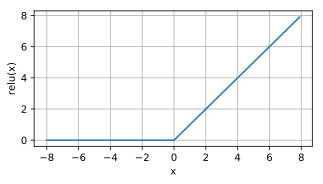

In [2]:
x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = npx.relu(x)
d2l.plot(x, y, 'x', 'relu(x)', figsize=(5, 2.5))

当输入为负数的时候 Relu的导数为0, 正数的时候导数为1, 取0的时候Relu不可导，在这些情况下，我们默认为左侧导数，并说输入为0时导数为0。绘制出ReLU的导数。

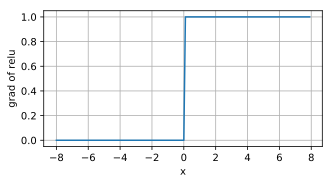

In [3]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

ReLU函数有很多变体，包括 参数化的ReLU（pReLU）函数。这种变化为ReLU添加了一个线性项，因此即使参数为负，某些信息仍然可以通过：
$$
\operatorname{pReLU}(x) = \max(0,x)+ \alpha \min(0,x)
$$

### 4.2 Sigmoid 函数
大名鼎鼎的s函数，在自然界广泛存在。sigmoid函数可以将元素的值变换到0和1之间：
$$
\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}
$$
基于梯度的学习时，S型函数是自然的选择，因为它是对阈值单元的平滑，可微的近似。当我们想将输出解释为二进制分类问题的概率时，Sigmoid仍被广泛用作输出单元上的激活函数（您可以将Sigmoid视为softmax的特例）。但它目前逐渐被更简单的ReLU函数取代。我们绘制了S型函数。请注意，当输入接近于0时，S型函数接近线性变换。

In [4]:
with autograd.record():
    y = npx.sigmoid(x)
d2l.plot(x, y, 'x', 'sigmoid(x)', figsize=(5, 2.5))

下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

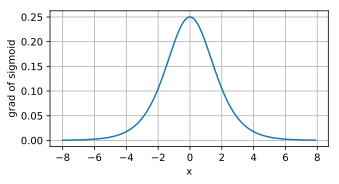

In [6]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### 4.3 正切函数
像sigmoid函数一样，tanh（双曲正切）函数也压缩其输入，将其转换为-1和1之间的区间的元素。
$$
\operatorname{tanh}(x) = \frac{1-\exp(-2x)}{1+ \exp(-2x)}
$$
在下面绘制tanh函数。注意，当输入接近0时，tanh函数接近线性变换。尽管函数的形状类似于S形函数，但tanh函数对坐标系的原点表现出点对称性。


In [7]:
with autograd.record():
    y = np.tanh(x)
d2l.plot(x, y, 'x', 'tanh(x)', figsize=(5, 2.5))

tanh函数的导数绘制如下。当输入接近0时，tanh函数的导数接近最大值1。正如我们在使用sigmoid函数时所看到的那样，当输入沿任一方向远离0时，tanh函数的导数都接近0。

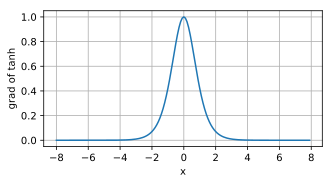

In [8]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))